In [1]:
import os
import numpy as np

from airLibs import airfoil as af
from airLibs import runF2w as f2w
from airLibs import plotting as aplt
from airLibs import runOpenFoam as of
from airLibs import runXFoil as xf

# Reynolds And Mach and AoA

In [2]:
def ms2mach(ms):
    return ms / 340.29

def Re(v, c, n):
    return (v * c) / n

In [3]:
chordMax = 0.18
chordMin = 0.11
umax = 30
umin = 5
ne = 1.56e-5

In [4]:
Machmin = ms2mach(10)
Machmax = ms2mach(30)
Remax = Re(umax, chordMax, ne)
Remin = Re(umin, chordMin, ne)
AoAmax = 15
AoAmin = -6
NoAoA = (AoAmax - AoAmin) * 2 + 1

angles = np.linspace(AoAmin, AoAmax, NoAoA)
Reynolds = np.logspace(np.log10(Remin), np.log10(Remax), 20, base=10)
Mach = np.linspace(Machmax, Machmin, 10)

Reyn = Remax
MACH = Machmax

In [5]:
CASE = "Wing"
os.chdir(CASE)
caseDir = f"Reynolds_{np.format_float_scientific(Reyn,sign=False,precision=3).replace('+', '')}"
os.system(f"mkdir -p {caseDir}")
os.chdir(caseDir)
caseDir = os.getcwd()

In [6]:
for i in os.listdir():
    if i.startswith("naca"):
        airfile = i
airfoil = airfile[4:]


OK


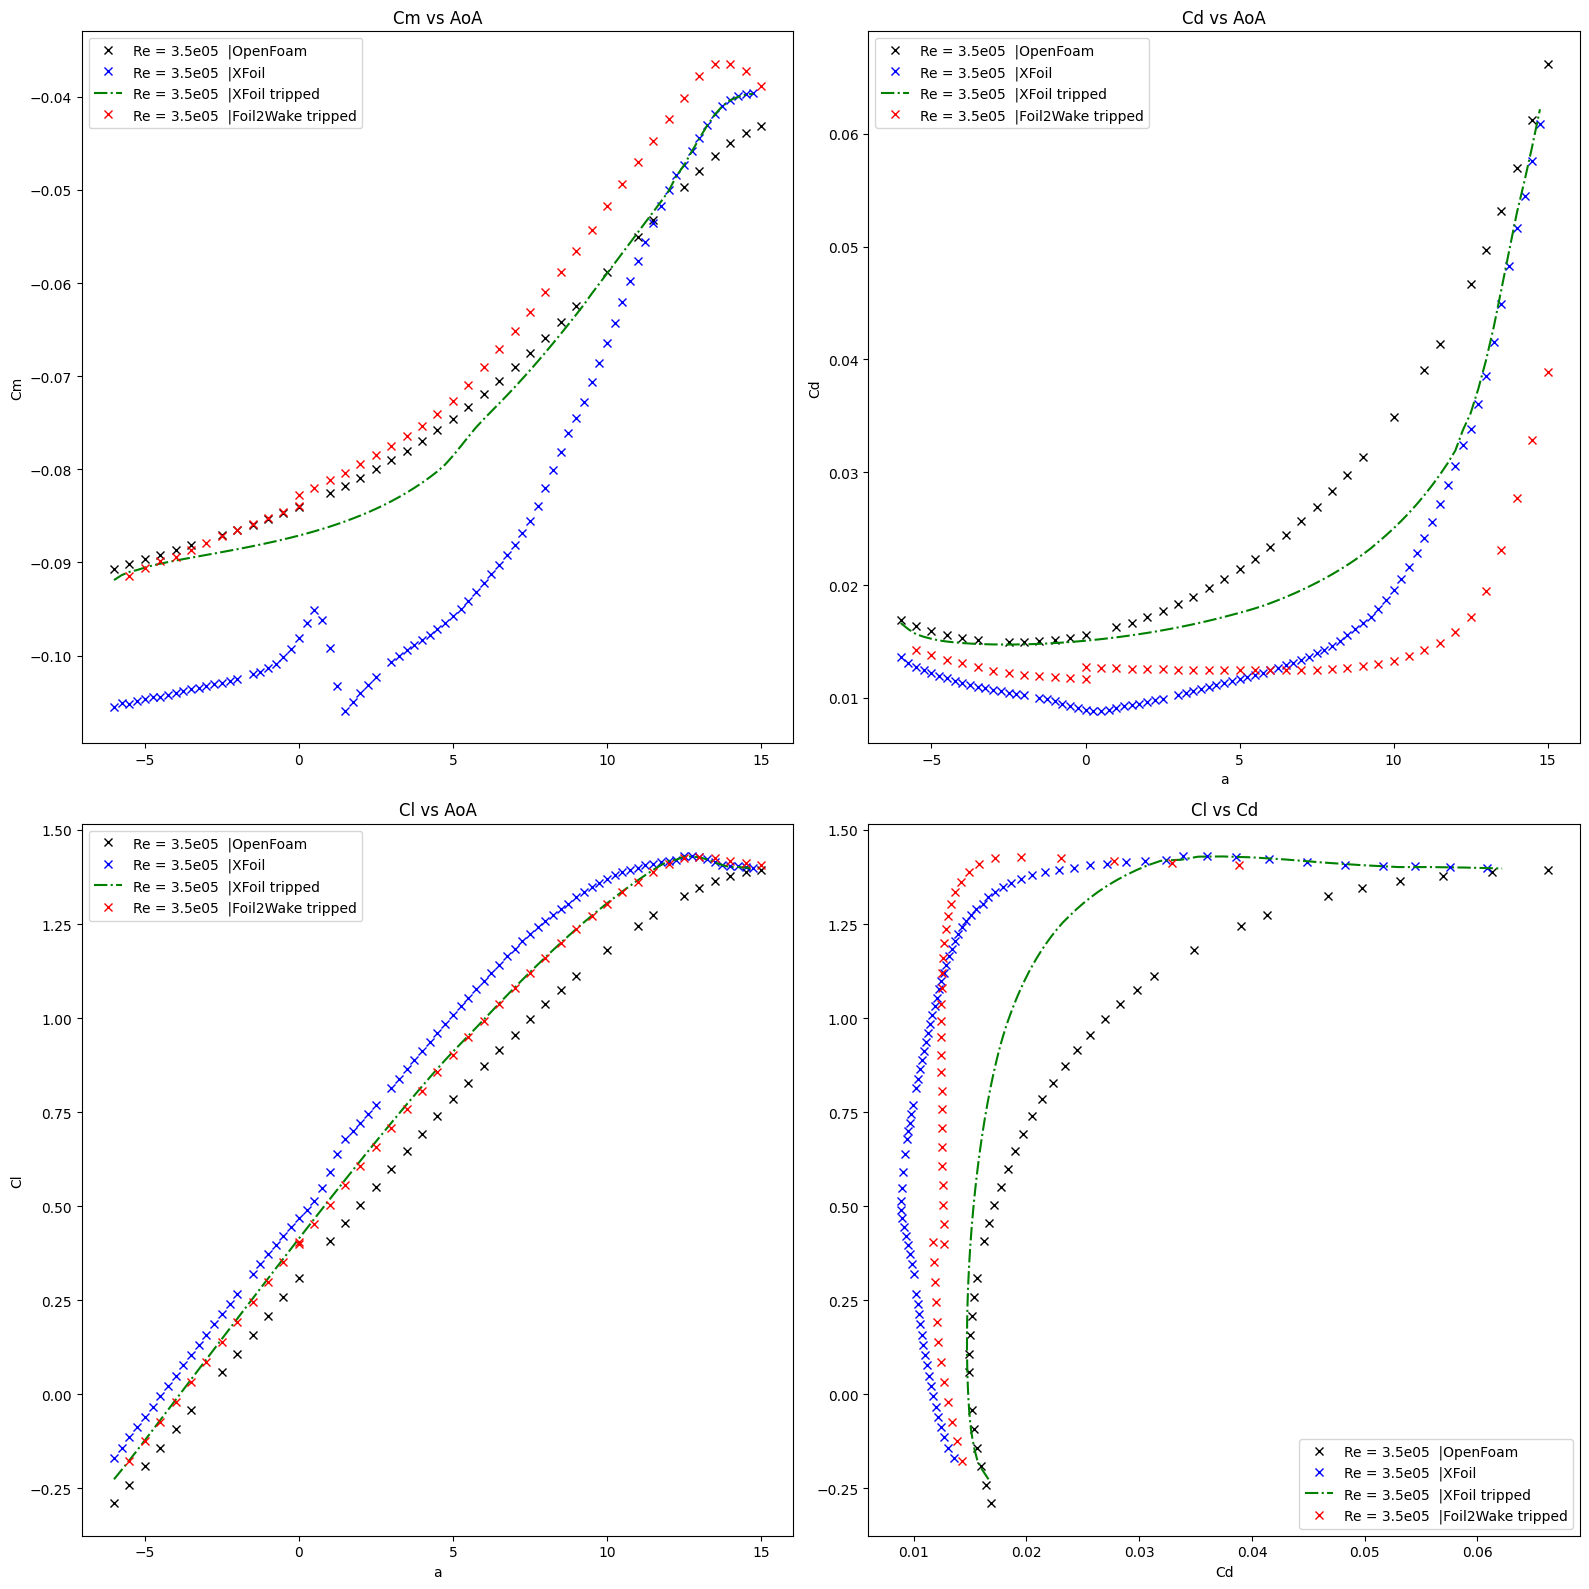

In [7]:
clcdcmFW = f2w.makeCLCD(Reyn, MACH)
clcdcmXF_t = xf.runXFoil(Reyn, MACH, angles, airfoil,0.1,0.1)

clcdcmXF = xf.runXFoil(Reyn, MACH, angles, airfoil)
clcdcmOF = of.makeCLCD(angles)
f2wD = [clcdcmFW, "rx",     f"Re = {np.format_float_scientific(Reyn,sign=False,precision=1).replace('+', '')}  |Foil2Wake tripped"]
openF = [clcdcmOF, "kx",    f"Re = {np.format_float_scientific(Reyn,sign=False,precision=1).replace('+', '')}  |OpenFoam"]
Xfoil = [clcdcmXF, "bx",    f"Re = {np.format_float_scientific(Reyn,sign=False,precision=1).replace('+', '')}  |XFoil"]
Xfoil_t = [clcdcmXF_t, "g-.",    f"Re = {np.format_float_scientific(Reyn,sign=False,precision=1).replace('+', '')}  |XFoil tripped"]

aplt.plotAeorCoeffs([openF, Xfoil,Xfoil_t,f2wD])

# XFOIL Analysis

In [8]:
pt,nt,x = xf.returnCPs(Reyn, MACH, angles, airfoil,0.1,0.1,9)
p,n,x = xf.returnCPs(Reyn, MACH, angles, airfoil,1,1,9)


0.08816009873931058
0.08816009873931058


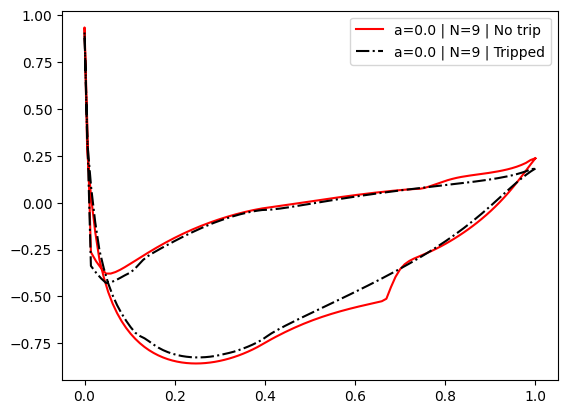

In [9]:
import matplotlib.pyplot as plt
cps_t , _ = pt
cps, angles = p
# angle = pangles[0]
# ind = 30
# plt.plot(x,cps_1[30],'b--',label = f"a={angle} | N=1 | No trip")
angle = angles[0] 
plt.plot(x,cps[0],'r-',label = f"a={angle} | N=9 | No trip")
plt.plot(x,cps_t[0],'k-.',label = f"a={angle} | N=9 | Tripped")
plt.legend(loc='best')

0.0


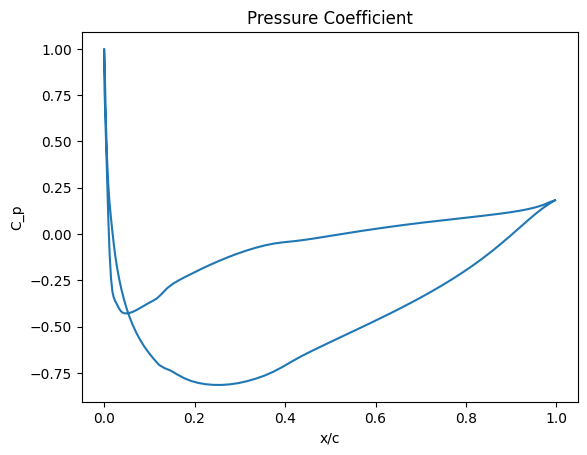

In [10]:
aplt.plotMultipleCPs([0.])

# Ncrit Comparison

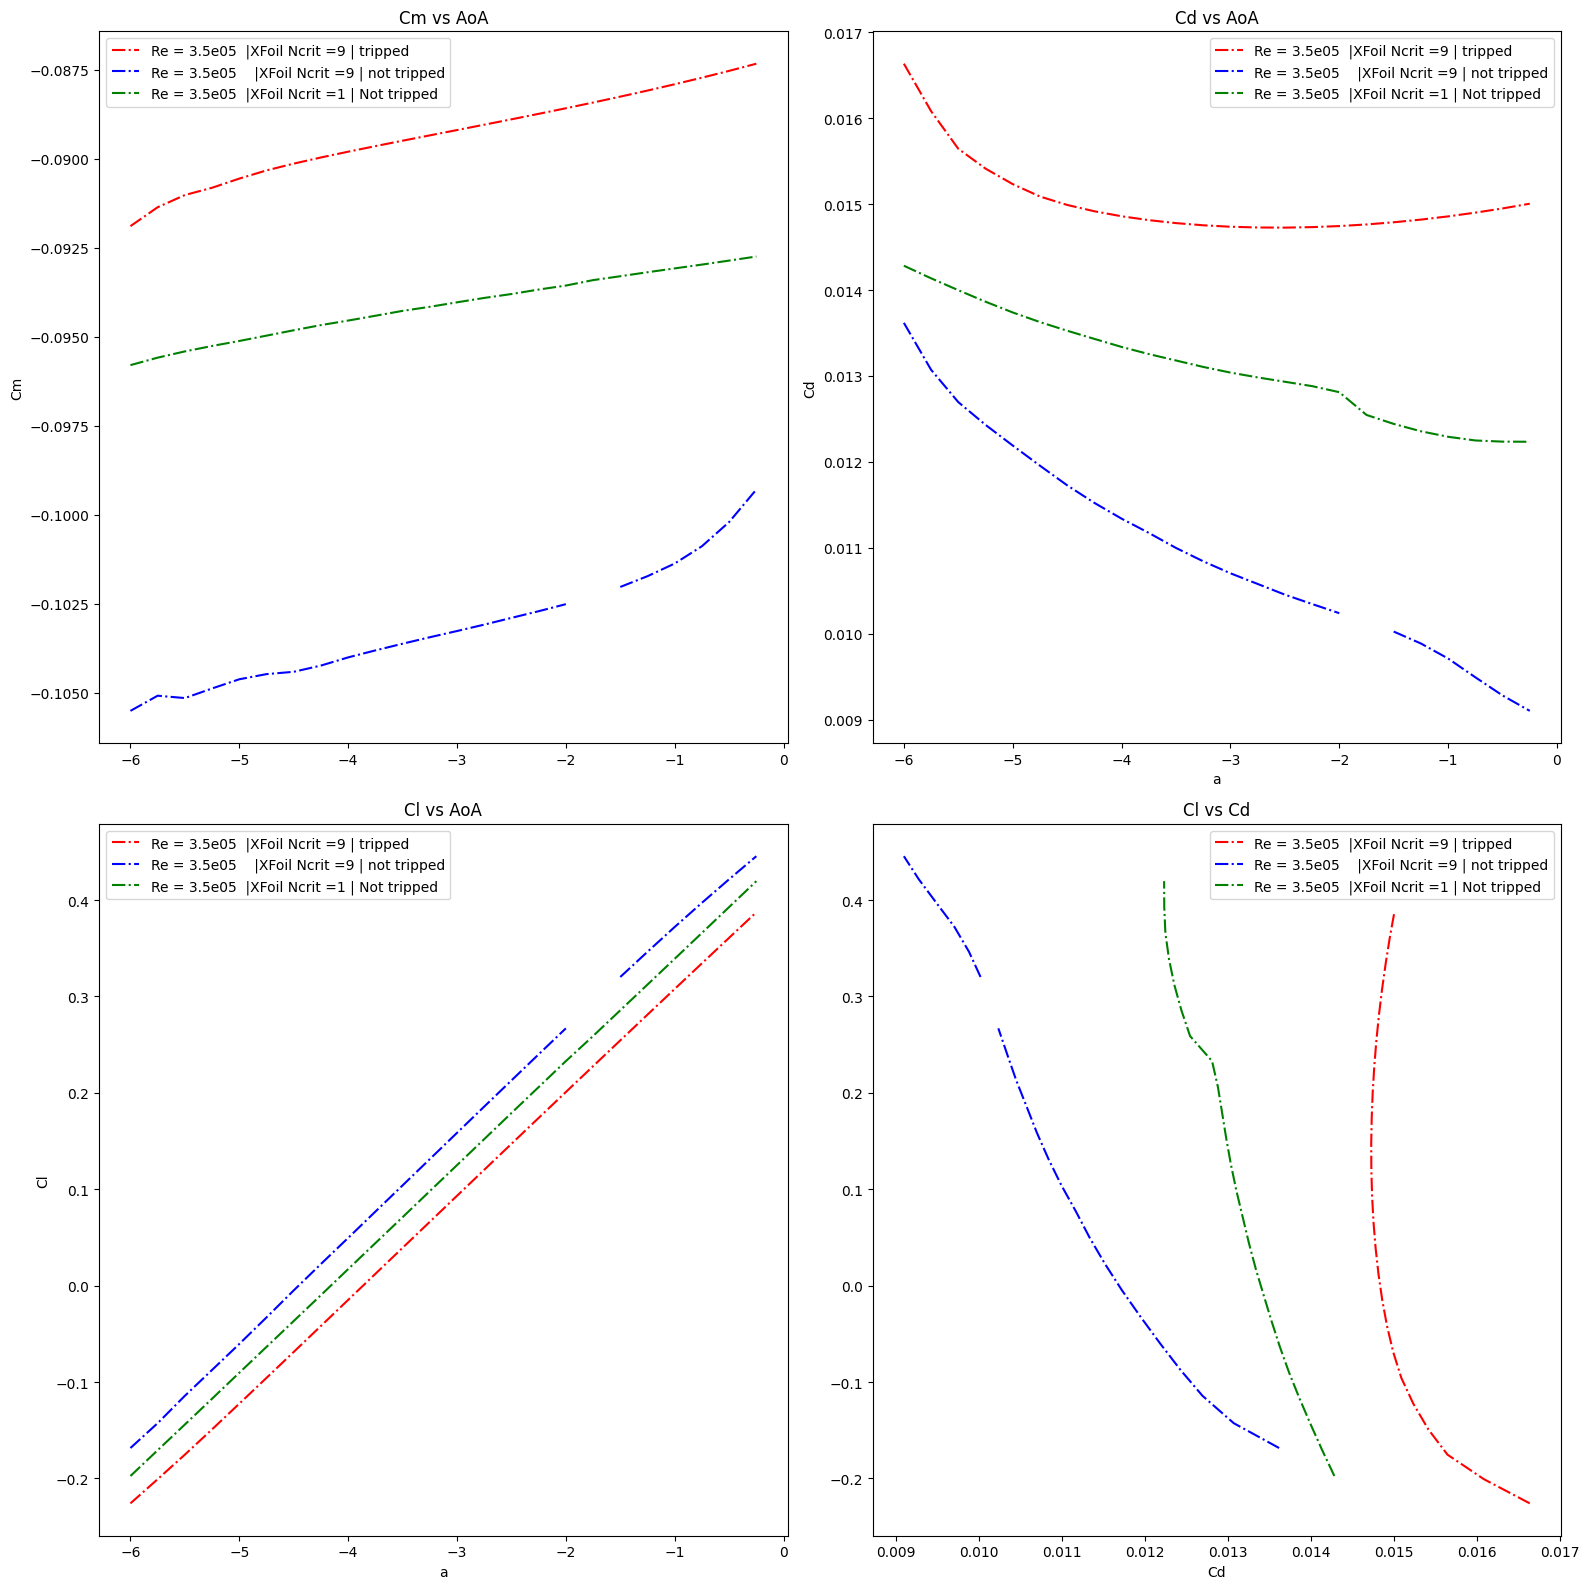

In [11]:
clcdcmXF_t = xf.runXFoil(Reyn, MACH, angles, airfoil,0.1,0.1,9)
clcdcmXF =   xf.runXFoil(Reyn, MACH, angles, airfoil,1,1,9)
clcdcmXF_n = xf.runXFoil(Reyn, MACH, angles, airfoil,1,1,1)

Xfoil_t = [clcdcmXF_t,  "r-.",    f"Re = {np.format_float_scientific(Reyn,sign=False,precision=1).replace('+', '')}  |XFoil Ncrit =9 | tripped"]
Xfoil = [clcdcmXF,      "b-.",    f"Re = {np.format_float_scientific(Reyn,sign=False,precision=1).replace('+', '')}    |XFoil Ncrit =9 | not tripped"]
Xfoil_n = [clcdcmXF_n,  "g-.",    f"Re = {np.format_float_scientific(Reyn,sign=False,precision=1).replace('+', '')}  |XFoil Ncrit =1 | Not tripped"]
aplt.plotAeorCoeffs([Xfoil_t,Xfoil,Xfoil_n])

# Reynolds Comparison

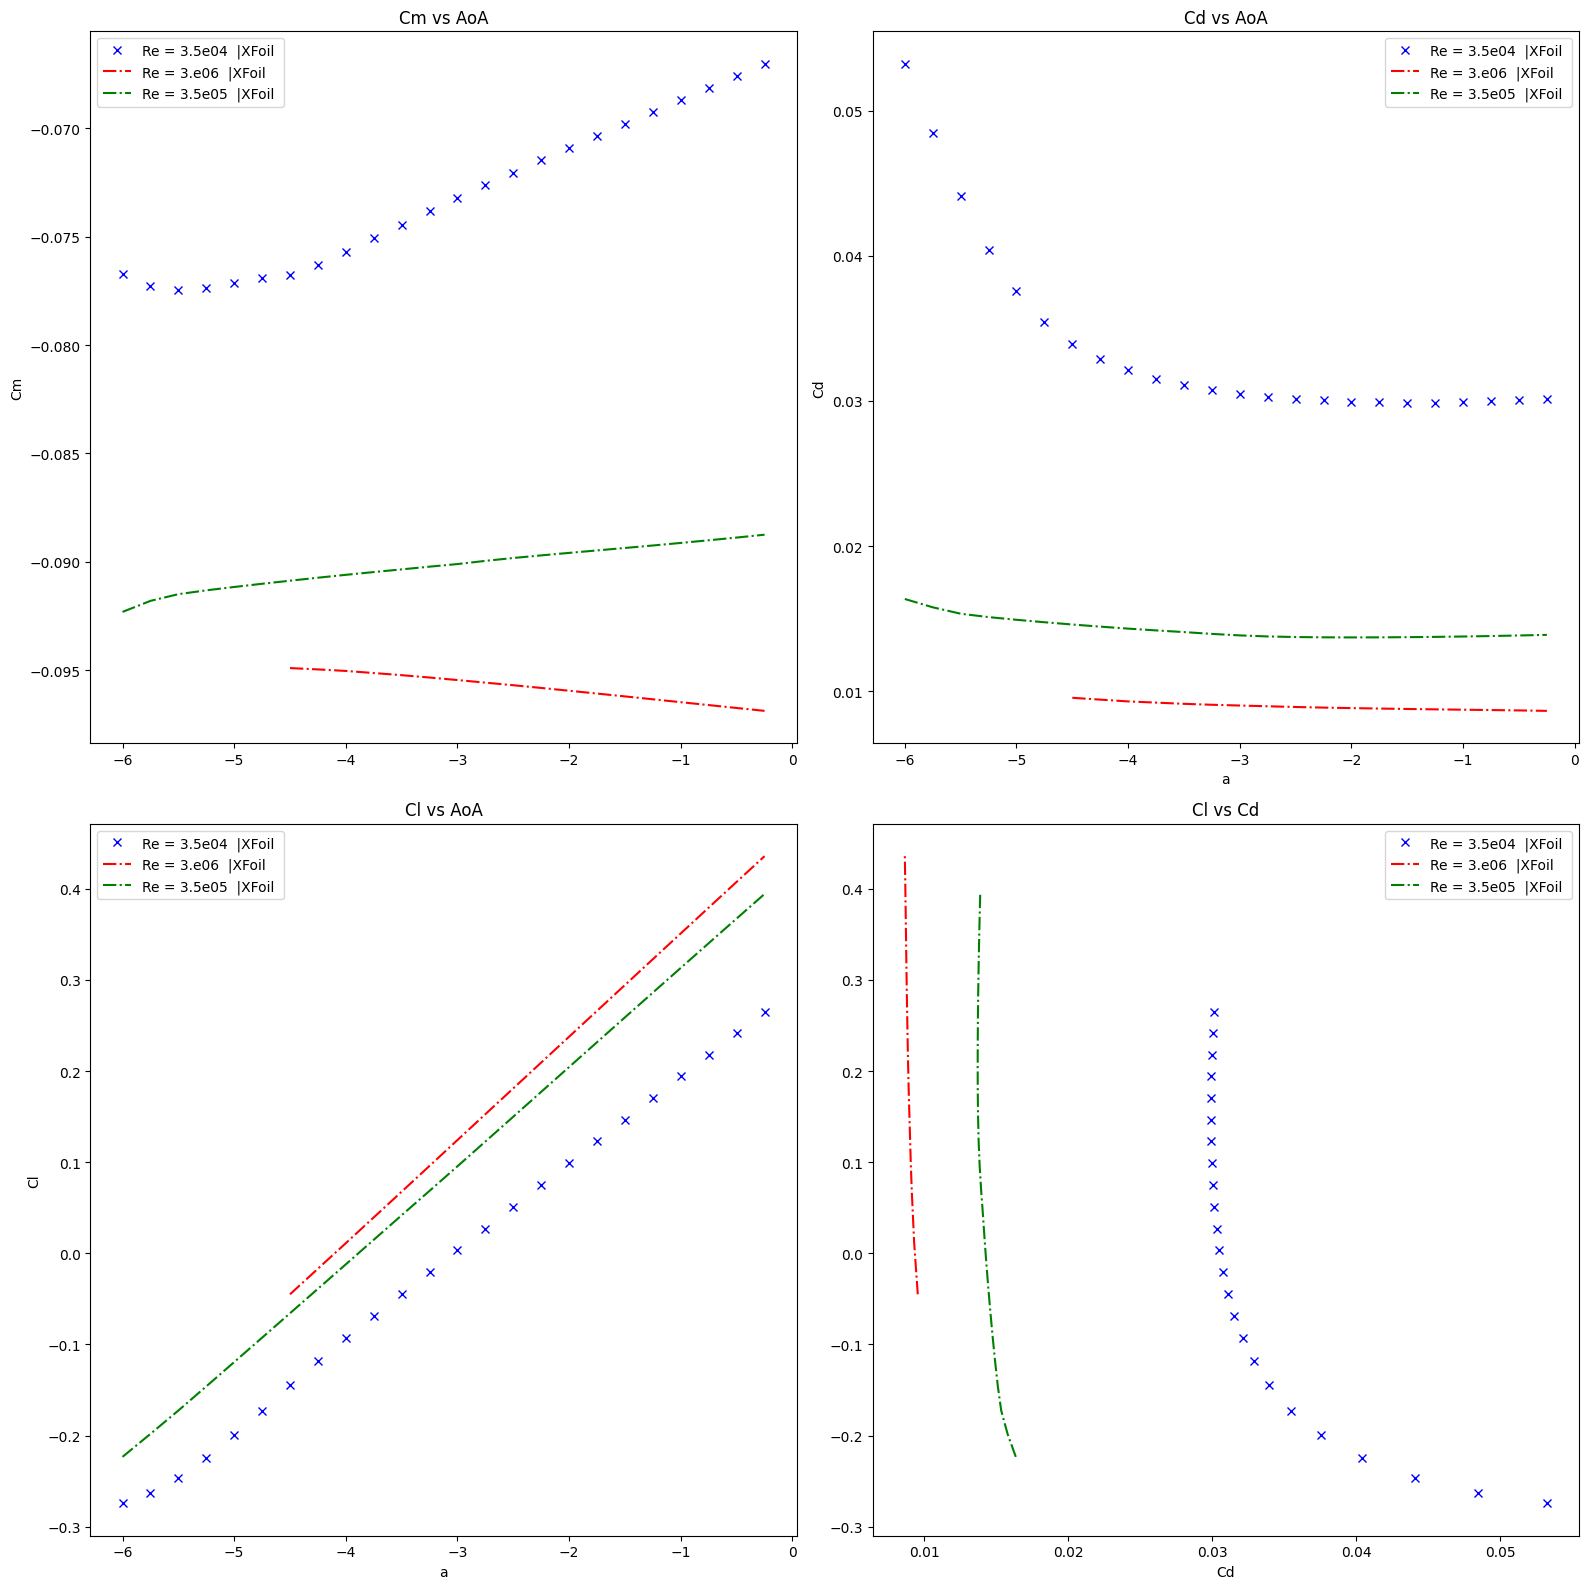

In [12]:
clcdcmXF_t = xf.runXFoil(Reynolds[0], MACH, angles, airfoil,0.2,0.2)
Xfoil_Remin = [clcdcmXF_t,  "bx",      f"Re = {np.format_float_scientific(Reynolds[0],sign=False,precision=1).replace('+', '')}  |XFoil"]

clcdcmXF_t = xf.runXFoil(3e6, MACH, angles, airfoil,0.2,0.2)
Xfoil_Rebig = [clcdcmXF_t, "r-.",    f"Re = {np.format_float_scientific(3e6,sign=False,precision=1).replace('+', '')}  |XFoil "]

clcdcmXF_t = xf.runXFoil(Reynolds[-1], MACH, angles, airfoil,0.2,0.2)
Xfoil_Remax = [clcdcmXF_t, "g-.",    f"Re = {np.format_float_scientific(Reynolds[-1],sign=False,precision=1).replace('+', '')}  |XFoil "]

aplt.plotAeorCoeffs([Xfoil_Remin,Xfoil_Rebig,Xfoil_Remax])

In [13]:
pl,nl,x = xf.returnCPs(Reynolds[0], MACH, angles, airfoil,0.2,0.2)
phh,nhh,x = xf.returnCPs(3e6, MACH, angles, airfoil,0.2,0.2)
ph,nh,x = xf.returnCPs(Reynolds[-1], MACH, angles, airfoil,0.2,0.2)

0.08816009873931058
0.08816009873931058
0.08816009873931058


Text(0, 0.5, 'C_p')

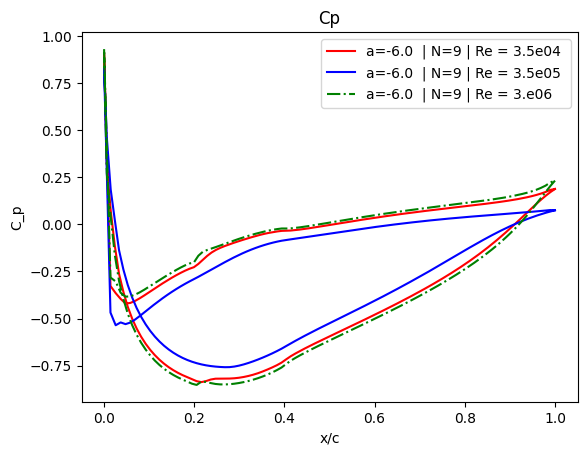

In [14]:
cpl , _ = pl
cph, angles = ph
cphh, angles = phh
# angle = pangles[0]
# ind = 30
# plt.plot(x,cps_1[30],'b--',label = f"a={angle} | N=1 | No trip")
angle = angles[0] 
plt.plot(x,cph[0],'r-',label =  f"a={angle}  | N=9 | Re = {np.format_float_scientific(Reynolds[0],sign=False,precision=1).replace('+', '')} ")
plt.plot(x,cpl[0],'b-',label =  f"a={angle}  | N=9 | Re = {np.format_float_scientific(Reynolds[-1],sign=False,precision=1).replace('+', '')} ")
plt.plot(x,cphh[0],'g-.',label =f"a={angle}  | N=9 | Re = {np.format_float_scientific(3e6,sign=False,precision=1).replace('+', '')} ")
plt.legend(loc='best')
plt.title("Cp")
plt.xlabel("x/c")
plt.ylabel("C_p")